In [1]:
### IMPORTS ###
import csv
import os
import pandas as pd
import itertools

% pylab inline

Populating the interactive namespace from numpy and matplotlib


# DATA INGESTION

In [2]:
### READ CSVS ###
lmdb = pd.read_csv(os.path.join('Data', 'PropertyMatching', 'LMDBProperties.csv'))
dbp = pd.read_csv(os.path.join('Data', 'PropertyMatching', 'DBPProperties.csv')).fillna(-1)

In [3]:
### CHECK OUT MY LMDB DATA ###
lmdb.head()

,LMDB_URI,LMDB_DB_link,LMDB_title,LMDB_runtime
0,http://data.linkedmdb.org/resource/film/11892,http://dbpedia.org/resource/Itlu_Sravani_Subra...,Itlu Sravani Subramanyam,-1
1,http://data.linkedmdb.org/resource/film/1788,http://dbpedia.org/resource/U.F.O._(film),U.F.O.,79
2,http://data.linkedmdb.org/resource/film/24385,http://dbpedia.org/resource/The_Bodyguard,Bodyguard,-1
3,http://data.linkedmdb.org/resource/film/4517,http://dbpedia.org/resource/The_Devil's_Rain,The Devil's Rain,86
4,http://data.linkedmdb.org/resource/film/18919,http://dbpedia.org/resource/Tide_of_Empire,Tide of Empire,-1


In [4]:
### THE NUMBER OF MISSING RUNTIME VALUES IS QUITE HIGH ###
print("                MISSING RUNTIME VALUES: ", len(lmdb[lmdb['LMDB_runtime'] == -1]))
print("MISSING RUNTIME VALUES TO DATASET SIZE: ", round(len(lmdb[lmdb['LMDB_runtime'] == -1]) / len(lmdb), 2))

                MISSING RUNTIME VALUES:  3994
MISSING RUNTIME VALUES TO DATASET SIZE:  0.42


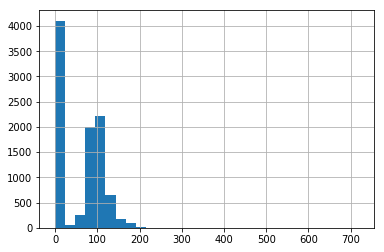

In [5]:
### THERE A WHOLE LOT OF RUNTIME VALUES MISSING, HENCE THE TALL TOWER TO THE LEFT. EVERYTHING ELSE SEEMS 
### RATHER NORMALLY DISTRIBUTED WITH LOW VARIANCE.
lmdb['LMDB_runtime'].hist(bins = 30)

,LMDB_URI,LMDB_DB_link,LMDB_title,LMDB_runtime
181,http://data.linkedmdb.org/resource/film/16878,http://dbpedia.org/resource/Once_an_Eagle,Once an Eagle,540
1938,http://data.linkedmdb.org/resource/film/1099,http://dbpedia.org/resource/Dune_(film),Dune,265
2670,http://data.linkedmdb.org/resource/film/8431,http://dbpedia.org/resource/Hezar_Dastan,Hezar Dastan,720
4569,http://data.linkedmdb.org/resource/film/1912,http://dbpedia.org/resource/L'amour_fou,L'Amour fou,252
4720,http://data.linkedmdb.org/resource/film/2943,http://dbpedia.org/resource/The_Deluge_(film),The Deluge,315
6697,http://data.linkedmdb.org/resource/film/9078,http://dbpedia.org/resource/Tamas_(film),Tamas,297
6743,http://data.linkedmdb.org/resource/film/5404,http://dbpedia.org/resource/October_1970_(film),October 1970,480
8009,http://data.linkedmdb.org/resource/film/2305,http://dbpedia.org/resource/Little_Dorrit_(film),Little Dorrit,360
8217,http://data.linkedmdb.org/resource/film/7485,http://dbpedia.org/resource/Sleep_(film),Sleep,321


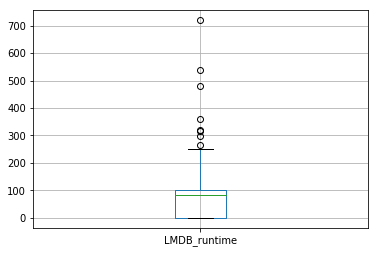

In [6]:
### THERE'S A BUNCH OF OUTLIERS THAT WE SHOULD TAKE A LOOK AT ###
### LOOKS LIKE SOME ARE NOT EVEN MOVIES
### SOME ARE TV SERIES AND THE RUNTIME IS THE SUM OF ALL EPISODES
### SOME ARE JUST LONG ASS MOVIES 
lmdb.boxplot()
lmdb[lmdb['LMDB_runtime'] > 250]

In [7]:
### CHECK OUT MY DBPEDIA DATA ###
dbp.head()

,DB_URI,DB_label,DB_title,DB_runtime
0,http://dbpedia.org/resource/The_City_Slicker,The City Slicker,The City Slicker,12.0
1,http://dbpedia.org/resource/Dangerously_Close,Dangerously Close,Dangerously Close,95.0
2,http://dbpedia.org/resource/Camp_(film),Camp (film),Camp,111.0
3,http://dbpedia.org/resource/A_Moment_of_Romance,A Moment of Romance,A Moment of Romance,88.0
4,http://dbpedia.org/resource/Mojave_Phone_Booth...,Mojave Phone Booth (film),Mojave Phone Booth,88.0


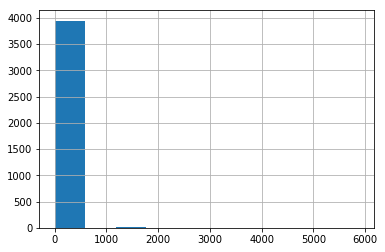

In [8]:
### RUNTIME VALUES LOOK VERY SPARE ###
dbp['DB_runtime'].hist()

In [9]:
### THERE'S 851 MISSING RUNTIME VALUES. WE WILL REMVOE THOSE ###
dbp[dbp['DB_runtime'] == -1].shape[0]

851

# DATA CLEANING

In [10]:
cleaned_lmdb = lmdb[lmdb['LMDB_runtime'] > -1]
assert lmdb.shape[0] == cleaned_lmdb.shape[0] + lmdb[lmdb['LMDB_runtime'] == -1].shape[0]

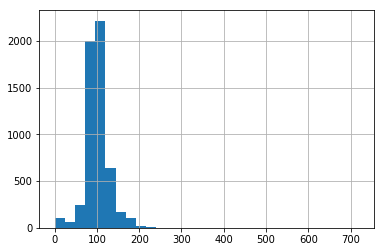

In [11]:
### LOOKS A BIT BETTER NOW. ###
cleaned_lmdb['LMDB_runtime'].hist(bins = 30)

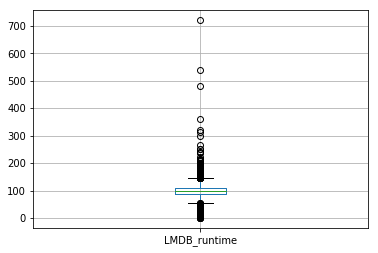

In [12]:
cleaned_lmdb.boxplot()

In [13]:
### LET'S REMOVE ALL THE MISSING VALUES ###
cleaned_dbp = dbp[dbp['DB_runtime'] > -1]

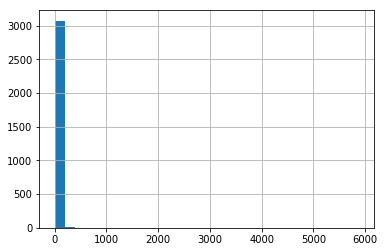

In [14]:
### STILL LOOK LIKE CRAP BECAUSE WE HAVE SOME MASSIVE OUTLIERS ###
cleaned_dbp['DB_runtime'].hist(bins = 30)

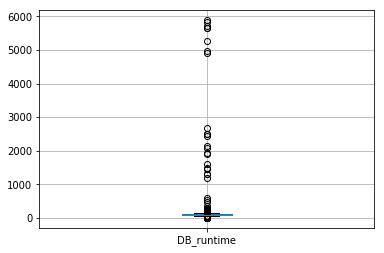

In [15]:
### MY BEST GUESS IS THAT THE HUGE VALUES ARE THERE BECAUSE 
cleaned_dbp.boxplot()

In [16]:
### CHECKING A COUPLE OF THOSE MOVIES IT LOOKS LIKE THEY USE A WEIRD UNIT OF MEASURE
### OR SOMETHING ELSE THAT I CANNOT FIGURE OUT. I WILL THESE AS THEY ARE.
cleaned_dbp[cleaned_dbp['DB_runtime'] > 2000]

,DB_URI,DB_label,DB_title,DB_runtime
375,http://dbpedia.org/resource/The_Trail_of_'98,The Trail of '98,The Trail of '98,2681.94
928,http://dbpedia.org/resource/Vijeta,Vijeta,Vijeta,4909.86
1150,http://dbpedia.org/resource/Disraeli_(film),Disraeli (film),Disraeli,2451.81
1241,http://dbpedia.org/resource/Coquette_(film),Coquette (film),Coquette,2131.00
1382,http://dbpedia.org/resource/I_Am_the_Law_(film),I Am the Law (film),I Am the Law,2072.64
1489,http://dbpedia.org/resource/Aloha_Summer,Aloha Summer,Aloha Summer,5880.00
1768,http://dbpedia.org/resource/The_Marriage_Circle,The Marriage Circle,The Marriage Circle,2499.00
1836,http://dbpedia.org/resource/Mystery_Date,Mystery Date,Mystery Date,5820.00
1848,http://dbpedia.org/resource/Against_All_Flags,Against All Flags,Against All Flags,4980.00
2874,http://dbpedia.org/resource/The_Adventures_of_...,The Adventures of Hajji Baba,The Adventures of Hajji Baba,5640.00


In [17]:
### IT LOOKS LIKE ALL DB TITLES ARE THERE, SO WE CAN DISCARD THE LABEL COLUMN ###
cleaned_dbp[cleaned_dbp['DB_title'] == '']

,DB_URI,DB_label,DB_title,DB_runtime


In [18]:
cleaned_dbp = cleaned_dbp.drop('DB_label', axis=1)

# DATA MERGING

In [19]:
### MERGE THE TWO SETS ONLY WHERE THE URIS MATCH ###
cleaned_lmdb_dbp = pd.merge(cleaned_lmdb, cleaned_dbp, left_on='LMDB_DB_link', right_on='DB_URI')
cleaned_lmdb_dbp.head()

,LMDB_URI,LMDB_DB_link,LMDB_title,LMDB_runtime,DB_URI,DB_title,DB_runtime
0,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,Bicentennial Man,132,http://dbpedia.org/resource/Bicentennial_Man_(...,Bicentennial Man,120.0
1,http://data.linkedmdb.org/resource/film/7928,http://dbpedia.org/resource/The_Hand_(film),The Hand,104,http://dbpedia.org/resource/The_Hand_(film),The Hand,104.0
2,http://data.linkedmdb.org/resource/film/19745,http://dbpedia.org/resource/The_Telegraph_Trail,The Telegraph Trail,54,http://dbpedia.org/resource/The_Telegraph_Trail,The Telegraph Trail,54.0
3,http://data.linkedmdb.org/resource/film/7321,http://dbpedia.org/resource/Eye_of_the_Needle_...,Eye of the Needle,112,http://dbpedia.org/resource/Eye_of_the_Needle_...,Eye of the Needle,112.0
4,http://data.linkedmdb.org/resource/film/11432,http://dbpedia.org/resource/A_Smoky_Mountain_C...,A Smoky Mountain Christmas,94,http://dbpedia.org/resource/A_Smoky_Mountain_C...,A Smoky Mountain Christmas,94.0


In [20]:
### WE ARE LEFT WITH ONLY 2208 EXAMPLES OUT OF 9000 SOMETHING ###
cleaned_lmdb_dbp.shape

(2208, 7)

In [21]:
### WE NEED TO GET THE CARTESION PRODUCT OF THE TWO SEPARATE DATAFRAMES THAT WE HAVE PREVIOUSLY COMBINED INTO ONE ###
def df_crossjoin(df1, df2, **kwargs):
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1

    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)

    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)

    return res


In [22]:
### SPLIT UP THE REDUCED DATAFRAMES AGAIN FOR CROSSPRODUCT ###
final_lmdb = cleaned_lmdb_dbp[['LMDB_URI', 'LMDB_DB_link', 'LMDB_title', 'LMDB_runtime']].copy()
final_dbp = cleaned_lmdb_dbp[['DB_URI', 'DB_title', 'DB_runtime']].copy()
### GET THE CROSS PRODUCT ###
cross_lmdb_dbp = df_crossjoin(final_lmdb, final_dbp)
### REARRANGE THE COLUMNS FOR EASIER VISUALISATION ###
rearranged_cols = ['LMDB_URI', 'LMDB_DB_link', 'DB_URI', 'LMDB_title', 'DB_title', 'LMDB_runtime', 'DB_runtime']
cross_lmdb_dbp = cross_lmdb_dbp[rearranged_cols]
cross_lmdb_dbp.head()

,LMDB_URI,LMDB_DB_link,DB_URI,LMDB_title,DB_title,LMDB_runtime,DB_runtime
0,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Bicentennial_Man_(...,Bicentennial Man,Bicentennial Man,132,120.0
1,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Hand_(film),Bicentennial Man,The Hand,132,104.0
2,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Telegraph_Trail,Bicentennial Man,The Telegraph Trail,132,54.0
3,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Eye_of_the_Needle_...,Bicentennial Man,Eye of the Needle,132,112.0
4,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/A_Smoky_Mountain_C...,Bicentennial Man,A Smoky Mountain Christmas,132,94.0


In [23]:
### WE SET THE GROUND TRUTH VALUES ACCORDING TO THE URI MATCH ###
cross_lmdb_dbp['GROUND_TRUTH'] = cross_lmdb_dbp['LMDB_DB_link'] ==cross_lmdb_dbp['DB_URI']
cross_lmdb_dbp.head()

,LMDB_URI,LMDB_DB_link,DB_URI,LMDB_title,DB_title,LMDB_runtime,DB_runtime,GROUND_TRUTH
0,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Bicentennial_Man_(...,Bicentennial Man,Bicentennial Man,132,120.0,True
1,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Hand_(film),Bicentennial Man,The Hand,132,104.0,False
2,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Telegraph_Trail,Bicentennial Man,The Telegraph Trail,132,54.0,False
3,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Eye_of_the_Needle_...,Bicentennial Man,Eye of the Needle,132,112.0,False
4,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/A_Smoky_Mountain_C...,Bicentennial Man,A Smoky Mountain Christmas,132,94.0,False


In [24]:
### BASELINE ATTEMPT AT INSTANCE MATCHING IS DONE BY EXACT MATCH ON TITLE AND RUNTIME ###
cross_lmdb_dbp['TITLE_MATCH'] = cross_lmdb_dbp['LMDB_title'] == cross_lmdb_dbp['DB_title']
cross_lmdb_dbp['RUNTIME_MATCH'] = cross_lmdb_dbp['LMDB_runtime'] == cross_lmdb_dbp['DB_runtime']
cross_lmdb_dbp['EXACT_MATCH'] = cross_lmdb_dbp['RUNTIME_MATCH'] & cross_lmdb_dbp['TITLE_MATCH']

In [42]:
cross_lmdb_dbp[(cross_lmdb_dbp['EXACT_MATCH']) & (cross_lmdb_dbp['GROUND_TRUTH'])].shape

(1545, 11)

In [33]:
cross_lmdb_dbp[cross_lmdb_dbp['GROUND_TRUTH']].shape

(2240, 11)

In [34]:
cross_lmdb_dbp.shape

(4875264, 11)

In [35]:
cross_lmdb_dbp.to_csv(os.path.join('Data', 'PropertyMatching', 'full_dataset.csv'))